In [2]:
import matplotlib.pyplot as plt
import pandas as pd

user_balance = pd.read_csv('user_balance_table.csv')
user_balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [3]:
user_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
user_id                int64
report_date            int64
tBalance               int64
yBalance               int64
total_purchase_amt     int64
direct_purchase_amt    int64
purchase_bal_amt       int64
purchase_bank_amt      int64
total_redeem_amt       int64
consume_amt            int64
transfer_amt           int64
tftobal_amt            int64
tftocard_amt           int64
share_amt              int64
category1              float64
category2              float64
category3              float64
category4              float64
dtypes: float64(4), int64(14)
memory usage: 390.1 MB


In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
user_balance.describe()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
count,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,2840421.000,173739.000,173739.000,173739.000,173739.000
mean,13963.375,20139113.995,1851317.641,1844321.218,32597.662,32355.558,11547.508,20808.049,25601.239,4636.036,20965.203,4057.832,16907.371,242.104,31000.486,18278.346,3845.624,22669.093
std,8068.157,3363.828,5894643.912,5884383.415,525392.305,525344.221,406710.839,327475.498,514539.618,88281.666,504425.152,114216.516,484099.041,791.474,206031.793,188607.848,174803.412,126223.904
min,1.000,20130701.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6999.000,20140215.000,2603.000,2484.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,400.000
50%,13883.000,20140501.000,81777.000,79800.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,4935.000
75%,20992.000,20140704.000,1065697.000,1057355.000,206.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,141.000,0.000,0.000,0.000,14000.000
max,28041.000,20140831.000,104285082.000,104273402.000,201768328.000,201768328.000,201275171.000,90973924.000,102310600.000,30000000.000,102310600.000,29399674.000,102310600.000,17749.000,5000000.000,5000000.000,30000000.000,5339991.000


In [11]:
user_balance.isnull().sum().sort_values(ascending=False)

category4              2666682
category2              2666682
category1              2666682
category3              2666682
purchase_bal_amt             0
report_date                  0
tBalance                     0
yBalance                     0
total_purchase_amt           0
direct_purchase_amt          0
total_redeem_amt             0
purchase_bank_amt            0
consume_amt                  0
transfer_amt                 0
tftobal_amt                  0
tftocard_amt                 0
share_amt                    0
user_id                      0
dtype: int64

C:\Users\TerryCai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


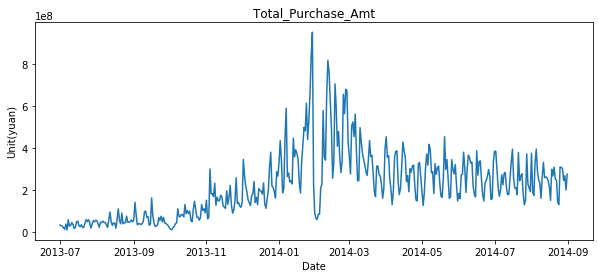

In [19]:
df_tmp = user_balance.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
df_tmp.reset_index(inplace=True)

df_tmp['report_date'] = pd.to_datetime(df_tmp['report_date'], format='%Y%m%d')

df_tmp.index = df_tmp['report_date']

total_purchase_amt = plt.figure(figsize=(10,4))
ax = total_purchase_amt.add_subplot(111)
ax.set(title='Total_Purchase_Amt',
      ylabel='Unit(yuan)', xlabel='Date')
plt.plot(df_tmp['report_date'], df_tmp['total_purchase_amt'])
plt.show()

In [23]:
#分割训练集和验证集合
import pandas as pd

def generate_purchase_seq():
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
    user_balance = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'],
                              index_col='report_date', date_parser=dateparse)
    df = user_balance.groupby(['report_date'])['total_purchase_amt'].sum()
    purchase_seg = pd.Series(df, name='Value')
    
    purchase_seq_train = purchase_seg['2014-04-01':'2014-07-31']
    purchase_seq_test = purchase_seg['2014-08-01':'2014-08-10']
    
    purchase_seq_train.to_csv('./purchase_seq_train.csv', header=True)
    purchase_seq_test.to_csv('./purchase_seq_test.csv', header=True)
    
generate_purchase_seq()

timeseries_adf: (-2.0639747511769895, 0.2592449964335155, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4191.005978668394)
timeseries_diff1_adf: (-6.542516143607575, 9.27066145097599e-09, 12, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 4193.843107210291)
timeseries_diff2_adf: (-5.615545867454427, 1.1766955956632762e-06, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4222.922633673088)


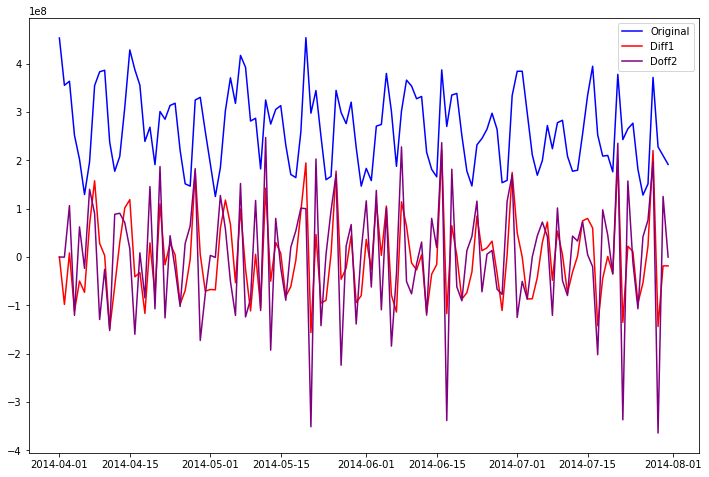

In [30]:
#进行一阶和二阶差分以及ADF检验
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)
    
    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)
    
    timeseries_adf = ADF(timeseries['Value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['Value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['Value'].tolist())
    
    print('timeseries_adf:', timeseries_adf)
    print('timeseries_diff1_adf:', timeseries_diff1_adf)
    print('timeseries_diff2_adf:', timeseries_diff2_adf)
    
    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Doff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    
dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

diff(purchase_seq_train)

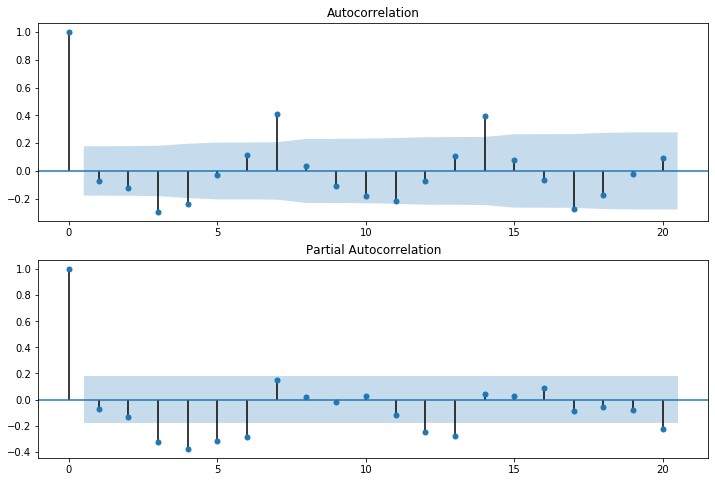

In [35]:
#分析ACF以及PACF 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()
    
dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

purchase_seq_train_diff = purchase_seq_train.diff(1)
purchase_seq_train_diff = purchase_seq_train_diff.fillna(0)

autocorrelation(purchase_seq_train_diff, 20)

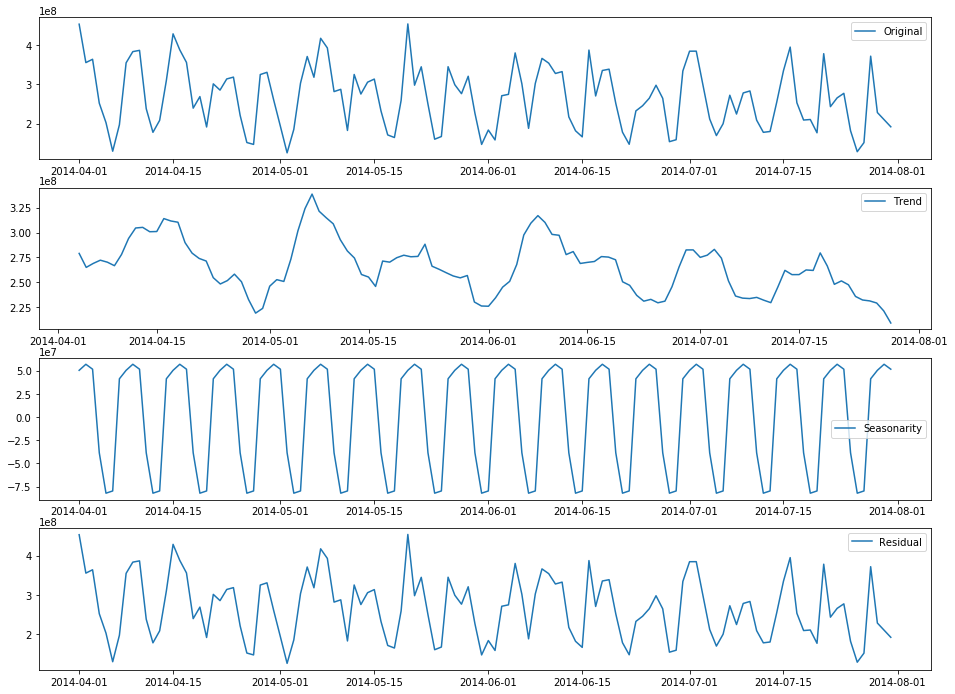

In [38]:
# 对时间序列分解（STL),再采用ARIMA模型来拟合趋势与残差序列
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(16,12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(timeseries, label='Residual')
    plt.legend(loc='best')
    plt.show()

dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

decomposing(purchase_seq_train)

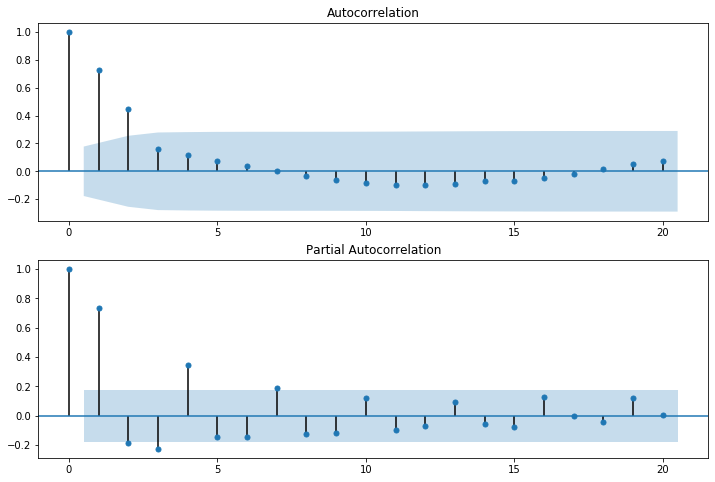

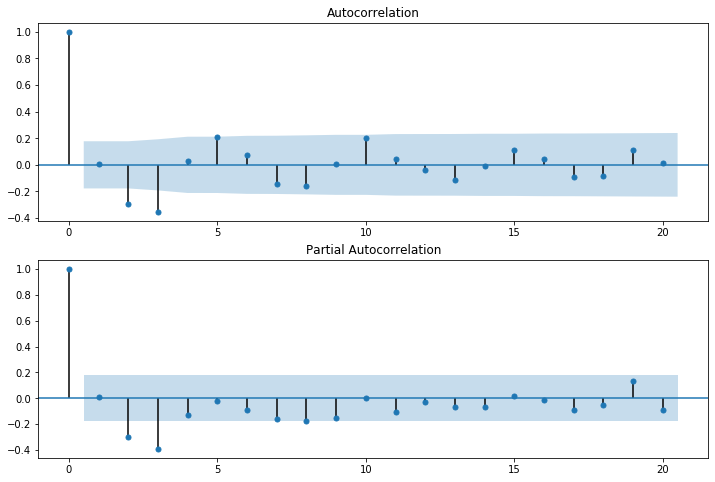

In [40]:
#检验时间序列分解后趋势序列和残差序列的平稳性
dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

autocorrelation(trend, 20)

autocorrelation(residual, 20)

In [44]:
import statsmodels.api as sm


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='nc', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)

C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


trend AIC (1, 0)
trend BIC (1, 0)


C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


residual AIC (2, 1)
residual BIC (2, 1)


C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


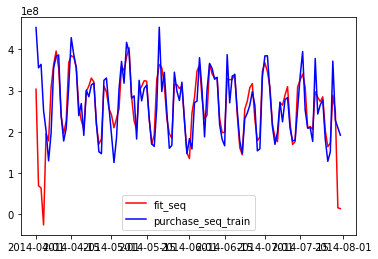

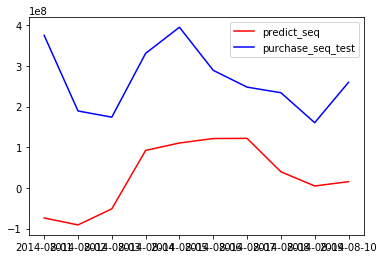

In [52]:
# 下面我们将分别训练趋势序列和残差序列的 ARIMA 模型，并结合原序列的周期，拟合训练集数据，并预测测试集数据。
# 对于训练集，拟合序列 = 周期序列 + 趋势序列（ARIMA拟合） + 残差序列（ARIMA拟合）
# 对于测试集，预测序列 = 周期序列 + 趋势序列（ARIMA预测） + 残差序列（ARIMA预测）
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit(disp=0)

dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d')

purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

purchase_seq_test = pd.read_csv('./purchase_seq_test.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_model = ARIMA_Model(trend,(1,0,0))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

residual_model = ARIMA_Model(residual, (2,0,1))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

fit_seq = pd.Series(seasonal['Value'], index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(purchase_seq_train, color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()

seasonal_predict_seq = seasonal['2014-04-04':'2014-04-13']

predict_dates = pd.Series(
    ['2014-08-01','2014-08-02','2014-08-03','2014-08-04','2014-08-05','2014-08-06','2014-08-07','2014-08-08',
    '2014-08-09','2014-08-10']).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))

seasonal_predict_seq.index = predict_dates

predict_seq = pd.Series(seasonal_predict_seq['Value'], index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)

plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(purchase_seq_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()






In [48]:
seasonal

,Value
report_date,
2014-04-01,50372084.390
2014-04-02,56897303.372
2014-04-03,51588098.318
2014-04-04,-38469082.759
2014-04-05,-82022867.835
...,...
2014-07-27,-79614556.936
2014-07-28,41249021.451
2014-07-29,50372084.390
